In [0]:
# Load libray files
import warnings
warnings.filterwarnings("ignore")

from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import save_model, load_model



In [116]:
# Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Utils:

In [0]:
def read_model(path):
  '''
    Read stored generator model.
    Parameter: 
        path(string): Path where the model is stored
    Return:
        keras.model:
  '''

  return load_model(path)



In [0]:
def predict(test_skets, generator):
  """
  A function for predicting colors of input sketches using trained generator.

  Parameters:
    test_skets (numpy.array): The black-and-white sketches.
    generator (keras.Model): A trained generator model.
  """

  pred = generator.predict(test_skets)

  # Rescaling the generated color images and input sketches to the range [0, 255].
  pred = (pred+1)/2.0
  test_skets = (test_skets+1)/2.0 

  # Displaying the generated color images from the generator.
  f, a = plt.subplots(test_skets.shape[0], 2,\
                      figsize=(.8 * test_skets.shape[0],\
                               5 * test_skets.shape[0]))
  a = a.flatten()
  idx = 0
  
  for sket, pic in zip(test_skets, pred):
    a[idx].imshow(sket) 
    a[idx].axis('off')
    a[idx+1].imshow(pic); 
    a[idx+1].axis('off')
    idx += 2

  plt.subplots_adjust(wspace=.1, hspace=.1)
  plt.show()

Load Generator

In [119]:
# Test Path
# Loading Generator model

ganModel_path = "/content/drive/My Drive/Case Study 2/NewModel/generator.h5"
generator = read_model(ganModel_path)



Read data which are not used at time of training.

**Accuracy Measure**

PSNR Score: Measure Pixel wise loss

In [0]:
# https://cvnote.ddlee.cn/2019/09/12/PSNR-SSIM-Python.html
def calculate_psnr(img1, img2):
    """
    This function calculate PSNR score
    parameters:
      
      img1: Original color image
      
      img2: Generated color image from GAN network

    Return: 

      PSNR score of twot images if score are mode 100 then exact match  
    """
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse)) # ,mse

SSIM Score: Loss with group of pixels

In [0]:
# SSIM Score
def ssim(img1, img2):
    """
    This function calculate SSIM scroe
    Paramerters:
      img1: Real image
      
      img3: Genertor created image
      
    Returns: 
    SSIM score it score is it is between -1 to 1 if 1 then images are 
    more similar and -1 then images are not similar
    """
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()

def calculate_ssim(img1, img2):
    '''
    This function returns SSIM scroe
    Paramerters:
    
      img1: Real image

      img3: Genertor created image
      
    Returns: SSIM score it score is it is between -1 to 1 if 1 then images are 
    more similar and -1 then images are not similar

    '''
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

In [0]:
test_sketch_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/sketch/0002/*.png")
test_image_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/src/0002/*.png")
test_sketch_path = np.array(test_sketch_path)

test_image_path = np.array(test_image_path)

test_image_path.sort()
test_sketch_path.sort()




Training Data Scores

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


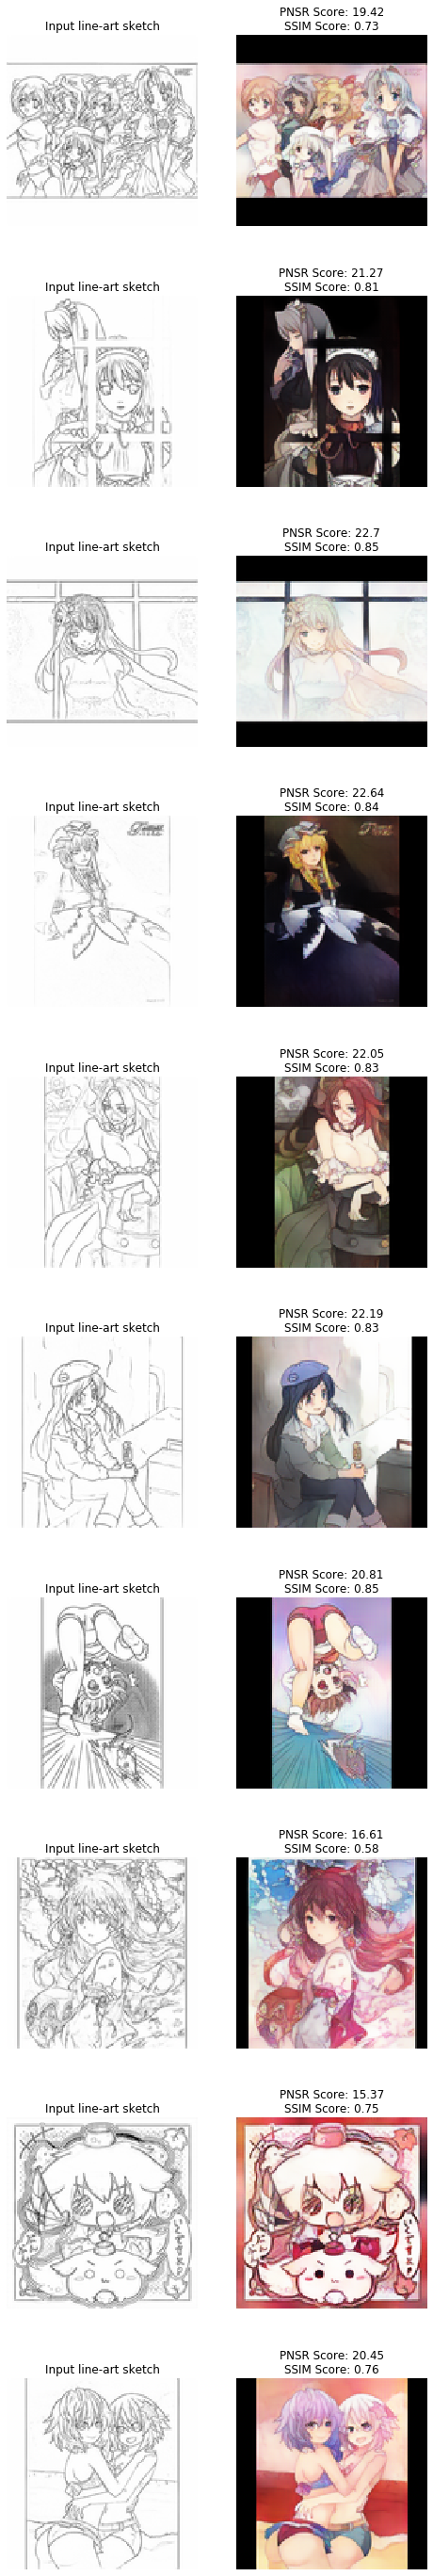

In [132]:

import math
import cv2

sketches = []
images = []

idxs = np.random.randint(0, len(test_sketch_path), 10) 

for sket, img in zip(test_sketch_path[idxs], test_image_path[idxs]):
    sketches.append(np.array(Image.open(sket).convert('RGB')))
    images.append(np.array(Image.open(img).convert('RGB')))



sketches = (np.array(sketches, dtype='float32')-127.5)/127.5
pred1 = generator.predict(sketches)

SSIM = []
pnsr = []

pred = (pred1 + 1) * 127.5
for i in range(0, 10):
  pnsr.append(calculate_psnr(images[i], pred[i]))
  SSIM.append(calculate_ssim(images[i], pred[i]))


# Displaying the generated color images from the generator.
f, a = plt.subplots(sketches.shape[0], 2,\
                      figsize=(.8 * sketches.shape[0],\
                               5 * sketches.shape[0]))
a = a.flatten()
idx = 0

idx = 0 
for ind, (sket, pic) in enumerate(zip(sketches, pred1)):
    a[idx].imshow((sket + 1) / 2.)
    a[idx].set_title('Input line-art sketch')
    a[idx].axis('off')
    a[idx+1].imshow((pic + 1) / 2.)
    a[idx +1].set_title('\n'.join(['PNSR Score: {}'.format(np.round(pnsr[ind], 2)),\
                          'SSIM Score: {}'.format(np.round(SSIM[ind] , 2))]))
    a[idx+1].axis('off')
    idx += 2

plt.subplots_adjust(wspace=.2, hspace=.2)
plt.show()

Test Data Score

In [0]:
test_sketch_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/sketch/0004/*.png")
test_image_path = glob.glob("/content/drive/My Drive/Case Study 2/Data/src/0004/*.png")
test_sketch_path = np.array(test_sketch_path)

test_image_path = np.array(test_image_path)

test_image_path.sort()
test_sketch_path.sort()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


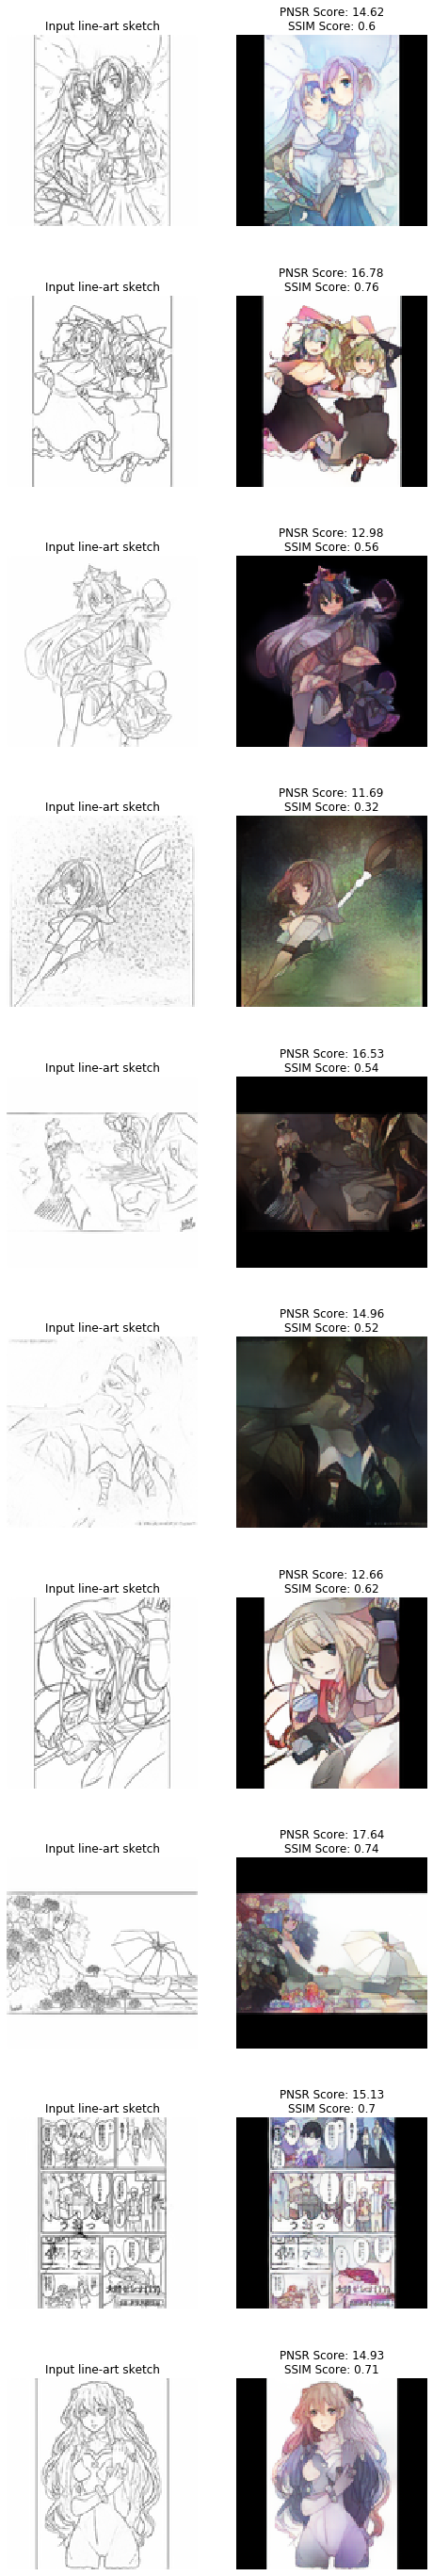

In [142]:
sketches = []
images = []

idxs = np.random.randint(0, len(test_sketch_path), 10) 

for sket, img in zip(test_sketch_path[idxs], test_image_path[idxs]):
    sketches.append(np.array(Image.open(sket).convert('RGB')))
    images.append(np.array(Image.open(img).convert('RGB')))



sketches = (np.array(sketches, dtype='float32')-127.5)/127.5
pred1 = generator.predict(sketches)

SSIM = []
pnsr = []

pred = (pred1 + 1) * 127.5
for i in range(0, 10):
  pnsr.append(calculate_psnr(images[i], pred[i]))
  SSIM.append(calculate_ssim(images[i], pred[i]))


# Displaying the generated color images from the generator.
f, a = plt.subplots(sketches.shape[0], 2,\
                      figsize=(.8 * sketches.shape[0],\
                               5 * sketches.shape[0]))
a = a.flatten()
idx = 0

idx = 0 
for ind, (sket, pic) in enumerate(zip(sketches, pred1)):
    a[idx].imshow((sket + 1) / 2.)
    a[idx].set_title('Input line-art sketch')
    a[idx].axis('off')
    a[idx+1].imshow((pic + 1) / 2.)
    a[idx +1].set_title('\n'.join(['PNSR Score: {}'.format(np.round(pnsr[ind], 2)),\
                          'SSIM Score: {}'.format(np.round(SSIM[ind] , 2))]))
    a[idx+1].axis('off')
    idx += 2

plt.subplots_adjust(wspace=.2, hspace=.2)
plt.show()

In [0]:
sketches = []
images = []

#idxs = np.random.randint(0, len(test_sketch_path), 10) 

for sket, img in zip(test_sketch_path, test_image_path):
    sketches.append(np.array(Image.open(sket).convert('RGB')))
    images.append(np.array(Image.open(img).convert('RGB')))



sketches = (np.array(sketches, dtype='float32')-127.5)/127.5
pred1 = generator.predict(sketches)

SSIM = []
pnsr = []

pred = (pred1 + 1) * 127.5
for i in range(0, 10):
  pnsr.append(calculate_psnr(images[i], pred[i]))
  SSIM.append(calculate_ssim(images[i], pred[i]))


In [106]:
print ("Mean:", np.mean(pnsr))
print ("Median:", np.median(pnsr))


Mean: 14.101106093324105
Median: 13.91109675116809


14.101106093324105

In [108]:
print ("SSIM Mean:", np.mean(SSIM))
print ("SSIM Median:", np.median(SSIM))


SSIM Mean: 0.5942513000314521
SSIM Median: 0.6281994437145764
